<a href="https://colab.research.google.com/github/mfatihp/MJpWLSp1Ug48DlJR/blob/main/term_deposit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Term-Deposit Classification***

Author : Muhammet Fatih POLAT

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Read data
data = pd.read_csv("term-deposit-marketing-2020.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [ ]:
# Basic insights for numeric data
data.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [ ]:
# Check datatypes and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [ ]:
# Unique values for each column
data.nunique()

age            70
job            12
marital         3
education       4
default         2
balance      6849
housing         2
loan            2
contact         3
day            31
month          11
duration     1535
campaign       48
y               2
dtype: int64

In [ ]:
# Change label datas: 'yes' = 1 | 'no' = 0
data.y.loc[data['y'] == 'no'] = 0
data.y.loc[data['y'] == 'yes'] = 1

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0


In [ ]:
# Mean and Standard Deviation of age for each label value
avg_age = data.groupby('y')['age'].mean()
stdev_age = data.groupby('y')['age'].std()

print("Age")
print("="*50)
print(f"Mean of Age (0): {avg_age[0]}")
print(f"Mean of Age (1): {avg_age[1]}")
print("\n")
print(f"Stdev of Age (0): {stdev_age[0]}")
print(f"Stdev of Age (1): {stdev_age[1]}")
print("-"*50)
print("\n")

Age
Mean of Age (0): 40.59920763260026
Mean of Age (1): 39.84495856353591


Stdev of Age (0): 9.525449829310007
Stdev of Age (1): 11.001984220396205
--------------------------------------------------




In [ ]:
# Mean and Standard Deviation of balance for each label value
avg_bal = data.groupby('y')['balance'].mean()
stdev_bal = data.groupby('y')['balance'].std()

print("Balance")
print("="*50)
print(f"Mean of Balance (0): {avg_bal[0]}")
print(f"Mean of Balance (1): {avg_bal[1]}")
print("\n")
print(f"Stdev of Balance (0): {stdev_bal[0]}")
print(f"Stdev of Balance (1): {stdev_bal[1]}")
print("-"*50)
print("\n")

Balance
Mean of Balance (0): 1249.7525334195775
Mean of Balance (1): 1588.495856353591


Stdev of Balance (0): 2900.7224359550637
Stdev of Balance (1): 2924.8944293984614
--------------------------------------------------




In [ ]:
# Mean and Standard Deviation of duration for each label value
avg_dur = data.groupby('y')['duration'].mean()
stdev_dur = data.groupby('y')['duration'].std()

print("Duration")
print("="*50)
print(f"Mean of Duration (0): {avg_dur[0]}")
print(f"Mean of Duration (1): {avg_dur[1]}")
print("\n")
print(f"Stdev of Duration (0): {stdev_dur[0]}")
print(f"Stdev of Duration (1): {stdev_dur[1]}")
print("-"*50)
print("\n")

Duration
Mean of Duration (0): 221.40804225959465
Mean of Duration (1): 682.9585635359116


Stdev of Duration (0): 206.36002225089965
Stdev of Duration (1): 431.28717377369435
--------------------------------------------------




In [ ]:
# Mean and Standard Deviation of campaign for each label value
avg_cam = data.groupby('y')['campaign'].mean()
stdev_cam = data.groupby('y')['campaign'].std()

print("Campaign")
print("="*50)
print(f"Mean of Campaign (0): {avg_cam[0]}")
print(f"Mean of Campaign (1): {avg_cam[1]}")
print("\n")
print(f"Stdev of Campaign (0): {stdev_cam[0]}")
print(f"Stdev of Campaign (1): {stdev_cam[1]}")
print("-"*50)
print("\n")

Campaign
Mean of Campaign (0): 2.91868801207417
Mean of Campaign (1): 2.414364640883978


Stdev of Campaign (0): 3.2980311479638744
Stdev of Campaign (1): 2.3060154444475893
--------------------------------------------------




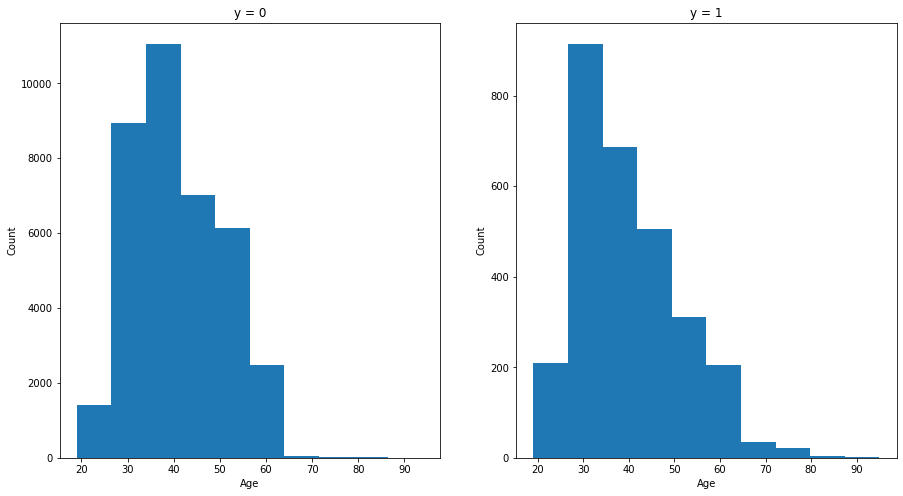

In [ ]:
# Histogram of Age
f = plt.figure(figsize=(15,8))
ax1 = f.add_subplot(121)
ax1.hist(data[data.y == 0]['age'])
ax1.set_title('y = 0')
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')

ax2 = f.add_subplot(122)
ax2.hist(data[data.y == 1]['age'])
ax2.set_title('y = 1')
ax2.set_xlabel('Age')
ax2.set_ylabel('Count')

plt.show()

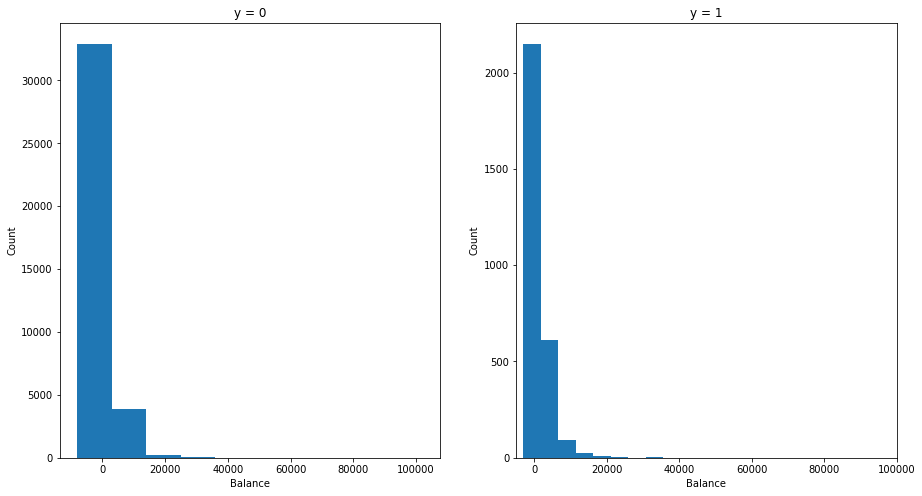

In [ ]:
# Histogram of Balance
f = plt.figure(figsize=(15,8))
ax1 = f.add_subplot(121)
ax1.hist(data[data.y == 0]['balance'])
ax1.set_title('y = 0')
ax1.set_xlabel('Balance')
ax1.set_ylabel('Count')

ax2 = f.add_subplot(122)
ax2.hist(data[data.y == 1]['balance'])
ax2.set_title('y = 1')
ax2.set_xlim((-5000, 100000))
ax2.set_xlabel('Balance')
ax2.set_ylabel('Count')

plt.show()

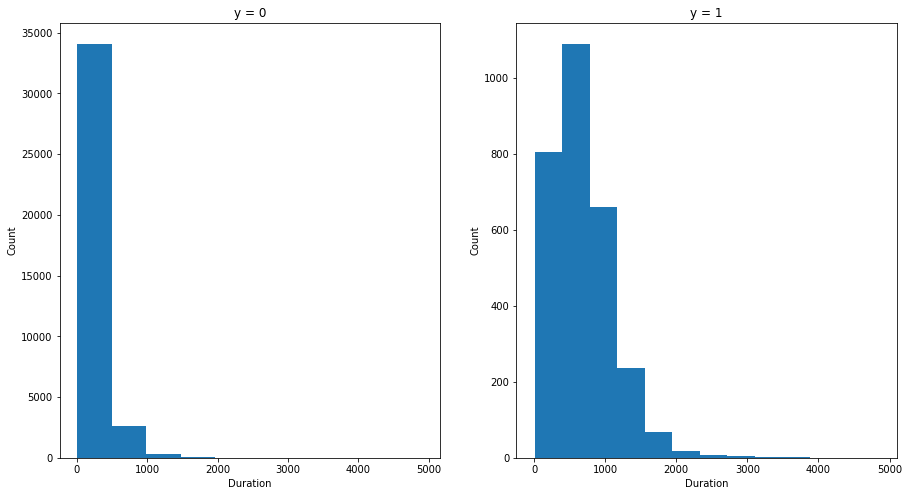

In [ ]:
# Histogram of Duration
f = plt.figure(figsize=(15,8))
ax1 = f.add_subplot(121)
ax1.hist(data[data.y == 0]['duration'])
ax1.set_title('y = 0')
ax1.set_xlabel('Duration')
ax1.set_ylabel('Count')

ax2 = f.add_subplot(122)
ax2.hist(data[data.y == 1]['duration'])
ax2.set_title('y = 1')
ax2.set_xlim((-250, 5100))
ax2.set_xlabel('Duration')
ax2.set_ylabel('Count')

plt.show()

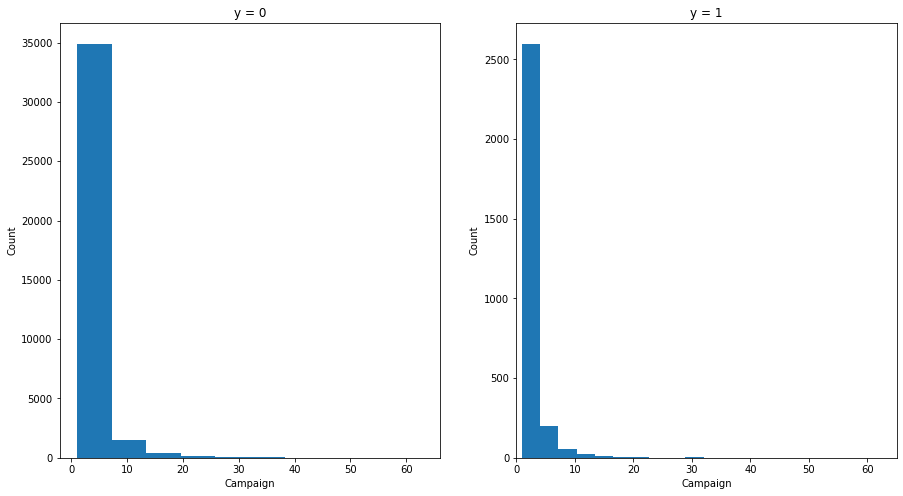

In [ ]:
# Histogram of Campaign
f = plt.figure(figsize=(15,8))
ax1 = f.add_subplot(121)
ax1.hist(data[data.y == 0]['campaign'])
ax1.set_title('y = 0')
ax1.set_xlabel('Campaign')
ax1.set_ylabel('Count')

ax2 = f.add_subplot(122)
ax2.hist(data[data.y == 1]['campaign'])
ax2.set_title('y = 1')
ax2.set_xlim((0, 65))
ax2.set_xlabel('Campaign')
ax2.set_ylabel('Count')

plt.show()

In [ ]:
# Crosstab for categorical features
# Keep
data_crosstab = pd.crosstab(data['job'], data['y'], margins=True)
data_crosstab['rate %'] = data_crosstab[1] / data_crosstab['All'] * 100
print(data_crosstab)

y                  0     1    All     rate %
job                                         
admin           4132   351   4483   7.829578
blue-collar     8848   535   9383   5.701801
entrepreneur    1317    88   1405   6.263345
housemaid       1034    53   1087   4.875805
management      7490   676   8166   8.278227
retired         1286   151   1437  10.508003
self-employed   1302   112   1414   7.920792
services        3672   238   3910   6.086957
student          442    82    524  15.648855
technician      6355   497   6852   7.253357
unemployed      1008    96   1104   8.695652
unknown          218    17    235   7.234043
All            37104  2896  40000   7.240000


In [ ]:
# Divorced + Single = not-married
# Keep
data_crosstab = pd.crosstab(data['marital'], data['y'], margins=True)
data_crosstab['rate %'] = data_crosstab[1] / data_crosstab['All'] * 100
print(data_crosstab)

y             0     1    All    rate %
marital                               
divorced   4334   391   4725  8.275132
married   22908  1478  24386  6.060855
single     9862  1027  10889  9.431536
All       37104  2896  40000  7.240000


In [ ]:
singles = (data_crosstab[1][0] + data_crosstab[1][2])/(data_crosstab['All'][0] + data_crosstab['All'][2])*100
print(f"Rate of total singles : {singles}")['job', 'education', 'housing', 'loan', 'month', 'marital']

Rate of total singles : 9.081593441783015


In [ ]:
# Keep
data_crosstab = pd.crosstab(data['education'], data['y'], margins=True)
data_crosstab['rate %'] = data_crosstab[1] / data_crosstab['All'] * 100
print(data_crosstab)

y              0     1    All    rate %
education                              
primary     5917   353   6270  5.629984
secondary  19575  1418  20993  6.754632
tertiary   10177  1029  11206  9.182581
unknown     1435    96   1531  6.270411
All        37104  2896  40000  7.240000


In [ ]:
# Drop (diff < %2 and too few sample for 'yes')
data_crosstab = pd.crosstab(data['default'], data['y'], margins=True)
data_crosstab['rate %'] = data_crosstab[1] / data_crosstab['All'] * 100
print(data_crosstab)

y            0     1    All    rate %
default                              
no       36344  2847  39191  7.264423
yes        760    49    809  6.056860
All      37104  2896  40000  7.240000


In [ ]:
# Keep
data_crosstab = pd.crosstab(data['housing'], data['y'], margins=True)
data_crosstab['rate %'] = data_crosstab[1] / data_crosstab['All'] * 100
print(data_crosstab)

y            0     1    All    rate %
housing                              
no       14537  1432  15969  8.967374
yes      22567  1464  24031  6.092131
All      37104  2896  40000  7.240000


In [ ]:
# Keep
data_crosstab = pd.crosstab(data['loan'], data['y'], margins=True)
data_crosstab['rate %'] = data_crosstab[1] / data_crosstab['All'] * 100
print(data_crosstab)

y         0     1    All    rate %
loan                              
no    30554  2516  33070  7.608104
yes    6550   380   6930  5.483405
All   37104  2896  40000  7.240000


In [ ]:
# Drop (diff < %2)
data_crosstab = pd.crosstab(data['contact'], data['y'], margins=True)
data_crosstab['rate %'] = data_crosstab[1] / data_crosstab['All'] * 100
print(data_crosstab)

y              0     1    All    rate %
contact                                
cellular   22681  2233  24914  8.962832
telephone   2155   166   2321  7.152090
unknown    12268   497  12765  3.893459
All        37104  2896  40000  7.240000


In [ ]:
# Keep
data_crosstab = pd.crosstab(data['month'], data['y'], margins=True)
data_crosstab['rate %'] = data_crosstab[1] / data_crosstab['All'] * 100
print(data_crosstab)

y          0     1    All     rate %
month                               
apr     2267   451   2718  16.593083
aug     4927   288   5215   5.522531
dec       12     1     13   7.692308
feb     2041   255   2296  11.106272
jan     1138    38   1176   3.231293
jul     5996   384   6380   6.018809
jun     4440   294   4734   6.210393
mar      133   125    258  48.449612
may    12741   791  13532   5.845403
nov     3378   220   3598   6.114508
oct       31    49     80  61.250000
All    37104  2896  40000   7.240000


In [ ]:
# Drop (Has not specific information)
data_crosstab = pd.crosstab(data['day'], data['y'], margins=True)
data_crosstab['rate %'] = data_crosstab[1] / data_crosstab['All'] * 100
print(data_crosstab)

y        0     1    All     rate %
day                               
1      136    40    176  22.727273
2     1005   104   1109   9.377818
3      794    80    874   9.153318
4     1066   117   1183   9.890110
5     1578   113   1691   6.682436
6     1668   110   1778   6.186727
7     1532    80   1612   4.962779
8     1518   102   1620   6.296296
9     1302    72   1374   5.240175
10     319    45    364  12.362637
11    1187    85   1272   6.682390
12    1185   104   1289   8.068270
13    1208   117   1325   8.830189
14    1521   115   1636   7.029340
15    1345   123   1468   8.378747
16    1119    96   1215   7.901235
17    1697   115   1812   6.346578
18    2008   165   2173   7.593189
19    1577    73   1650   4.424242
20    2502   153   2655   5.762712
21    1775   139   1914   7.262278
22     693    80    773  10.349288
23     764    59    823   7.168894
24     320    32    352   9.090909
25     623    72    695  10.359712
26     834    61    895   6.815642
27     890    84    

In [ ]:
# Keep 
# Campaign is numeric type data, but must be checked
data_crosstab = pd.crosstab(data['campaign'], data['y'], margins=True)
data_crosstab['rate %'] = data_crosstab[1] / data_crosstab['All'] * 100
print(data_crosstab)

y             0     1    All     rate %
campaign                               
1         13454  1264  14718   8.588123
2         10393   760  11153   6.814310
3          4618   352   4970   7.082495
4          3075   222   3297   6.733394
5          1547    95   1642   5.785627
6          1160    68   1228   5.537459
7           664    35    699   5.007153
8           501    25    526   4.752852
9           299    19    318   5.974843
10          250    12    262   4.580153
11          184    13    197   6.598985
12          150     4    154   2.597403
13          125     6    131   4.580153
14           89     4     93   4.301075
15           79     4     83   4.819277
16           76     2     78   2.564103
17           63     6     69   8.695652
18           51     0     51   0.000000
19           44     0     44   0.000000
20           42     1     43   2.325581
21           34     1     35   2.857143
22           23     0     23   0.000000
23           22     0     22   0.000000


Columns that could be dropped : default, contact, day

In [30]:
# Drop selected columns
temp = data.drop(columns=['default', 'contact', 'day'])

In [32]:
y1_df = temp[temp['y'] == 1]
y1_df = y1_df.drop('y', axis=1)
y1_df.head()

,age,job,marital,education,balance,housing,loan,month,duration,campaign
83,59,admin,married,secondary,2343,yes,no,may,1042,1
86,56,admin,married,secondary,45,no,no,may,1467,1
87,41,technician,married,secondary,1270,yes,no,may,1389,1
129,55,services,married,secondary,2476,yes,no,may,579,1
168,54,admin,married,tertiary,184,no,no,may,673,2


In [40]:
# Most frequent values of categorical features
# Average of numeric features
from scipy.stats import mode
col = y1_df.columns
vals = []

for i in col:
  if y1_df[i].dtype == 'object':
    val = mode(y1_df[i])[0]
  else:
    val = np.mean(y1_df[i])
  
  vals.append(val)

for j in range(len(vals)):
  space = " "*(10-len(col[j]))
  print(f"{col[j]}{space} : {vals[j]}")

age        : 39.84495856353591
job        : ['management']
marital    : ['married']
education  : ['secondary']
balance    : 1588.495856353591
housing    : ['yes']
loan       : ['no']
month      : ['may']
duration   : 682.9585635359116
campaign   : 2.414364640883978


In [8]:
temp.head()

,age,job,marital,education,balance,housing,loan,month,duration,campaign,y
0,58,management,married,tertiary,2143,yes,no,may,261,1,0
1,44,technician,single,secondary,29,yes,no,may,151,1,0
2,33,entrepreneur,married,secondary,2,yes,yes,may,76,1,0
3,47,blue-collar,married,unknown,1506,yes,no,may,92,1,0
4,33,unknown,single,unknown,1,no,no,may,198,1,0


In [9]:
# Get dummy variables
df = pd.get_dummies(temp, columns=['job', 'education', 'housing', 'loan', 'month', 'marital'])
len(df.columns)

39

In [ ]:
df.head()

,age,balance,duration,campaign,y,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes,loan_no,loan_yes,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,marital_divorced,marital_married,marital_single
0,58,2143,261,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,44,29,151,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,33,2,76,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,47,1506,92,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,33,1,198,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [10]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

In [11]:
# Create features and label variables
label = df.pop('y').astype('int32')
features = df

print(f"Shape of features : {features.shape}")
print(f"Shape of label    : {label.shape}")

Shape of features : (40000, 38)
Shape of label    : (40000,)


In [12]:
# Make train - test split
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42)

In [13]:
# Create random forest classifier
# Avoid from imbalancing effect with class_weight
rf = RandomForestClassifier(class_weight='balanced_subsample')

# Calculate cross validation results
cv_results = cross_validate(rf, x_train, y_train, cv=5, return_train_score=True, return_estimator=True)
cv_results.keys()

dict_keys(['fit_time', 'score_time', 'estimator', 'test_score', 'train_score'])

In [14]:
# Training scores for each fold
cv_results['train_score']

array([1.        , 1.        , 1.        , 1.        , 0.99995536])

In [15]:
# Average of train scores
np.mean(cv_results['train_score'])

0.9999910714285715

In [16]:
# Testing scores for each fold
cv_results['test_score']

array([0.93178571, 0.93232143, 0.93321429, 0.93178571, 0.93125   ])

In [17]:
# Average of test scores
np.mean(cv_results['test_score'])

0.9320714285714284

In [18]:
# Take estimator 
rf_model_list = cv_results['estimator']
model = rf_model_list[1]

# Make prediction on test data and calculate results
score = model.score(x_test, y_test)
print(f"Test Score : {score}")

Test Score : 0.9295833333333333


In [19]:
# Raw importances
importance = model.feature_importances_
cols = x_train.columns

# Create dataframe and sort by importance
imp_df = pd.DataFrame({'col_names': cols, 'importance': importance})
imp_df.sort_values('importance', ascending=False)

,col_names,importance
2,duration,0.502957
1,balance,0.096109
0,age,0.082426
3,campaign,0.041442
24,month_apr,0.031323
31,month_mar,0.020880
27,month_feb,0.013483
20,housing_no,0.013284
21,housing_yes,0.012526
34,month_oct,0.012086


In [ ]:
# Calculate the total importance of dummy variables
# Dummy names
names = ['job', 'education', 'housing', 'loan', 'month', 'marital']
imps = []

for i in names:
  # Take importance values which has certain name
  name_cells = imp_df[imp_df['col_names'].str.startswith(i)]['importance']
  
  # Sum importances
  total = sum(name_cells)

  # Add total importance to imps list
  imps.append(total)

In [23]:
# Create DataFrame
imp_new = pd.DataFrame({'col_names': names, 'importance': imps})
imp_new

,col_names,importance
0,job,0.061971
1,education,0.028361
2,housing,0.025810
3,loan,0.012878
4,month,0.126076
5,marital,0.021970


In [24]:
# Final importance table
res_imp = imp_df.head(4)
res_imp = res_imp.append(imp_new, ignore_index=True)
res_imp.sort_values('importance', ascending=False)

,col_names,importance
2,duration,0.502957
8,month,0.126076
1,balance,0.096109
0,age,0.082426
4,job,0.061971
3,campaign,0.041442
5,education,0.028361
6,housing,0.025810
9,marital,0.021970
7,loan,0.012878


# **Conclusion**

Algorithm : Random Forest

Used columns : age, balance, duration, campaign, job, education, housing, loan, month, marital

Average Test Score (Cross Val.) = 0.932071

Test Score = 0.929583


---


##*Importances (Top 5)* 

1. duration
2. month
3. balance
4. age
5. job



---



##*Potential Customer Profile*

From frequency and average

- Age : 39.84495856353591
- Job : management
- Marital : married
- Education : secondary
- Balance : 1588.495856353591
- Housing : yes
- Loan : no